# Some info:

I am going to present two examples. These examples are taken from DataCamp (https://www.datacamp.com/). In both the examples  dataframes are converted into pandas, using spark, and then some of the attributes are plotted using matplotlib library.

# Importing some important libraries for execution

In [1]:
import findspark
findspark.init("path_to-hadoop3.2")

from pyspark import SparkConf
from pyspark.context import SparkContext

sc = SparkContext.getOrCreate(SparkConf())

from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()


# Constructing dataframe using spark
Example 1:

In [5]:
sample_list=[('Mona', 20), ('Jennifer', 34), ('John', 20), ('Jim', 26)]

# Create an RDD from the list
rdd = sc.parallelize(sample_list)

# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])    # Required dataframe


In [6]:
# Convert to Pandas DataFrame  
df_pandas = names_df.toPandas()

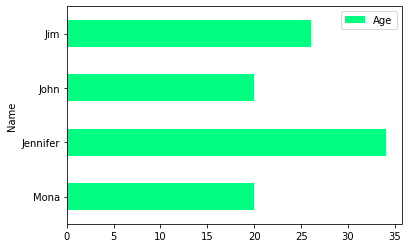

In [7]:
import matplotlib.pyplot as plt
# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='Name', y='Age', colormap='winter_r')
plt.show()

# Loading Fifa2018_dataset.csv from local folder
Example 2:

In [8]:
# Load the Dataframe
fifa_df = spark.read.csv("Fifa2018_dataset.csv", header=True, inferSchema=True)

# Collecting age column from the above frame:
Nationality must be Germany.

In [11]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')

# Construct the "query"
query = '''SELECT Age FROM fifa_df_table WHERE Nationality == "Germany"'''

# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)

# Conversion into pandas

In [12]:
# Convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

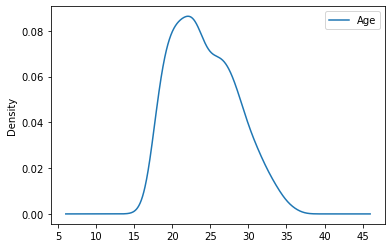

In [14]:
# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas.plot(kind='density')
plt.show()

# Matplotlib already been imported in example 1 so therefore there is no need to import again.

# Some statistics:

In [15]:
# Generate basic statistics
fifa_df_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293752|
|    min|               16|
|    max|               36|
+-------+-----------------+



# Conclusion:
Average age for Germany players is 24.2 that can also be varified by the graph (above). 